ELECTRICITY PRICE FORECASTING USING NEURAL NETWORKS

In [1]:
#!pip install chart_studio

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils.vis_utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
#from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import tensorflow

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

# Set seeds to make the experiment more reproducible.
from numpy.random import seed
tensorflow.random.set_seed(1)
seed(1)

Data Loading

In [ ]:
###HOURLY DATA

In [2]:

prices_df = pd.read_csv('prices.csv')

In [ ]:
prices_df.head()

,dates,hours,prices
0,01.10.2018,00:00,59.53
1,01.10.2018,01:00,56.10
2,01.10.2018,02:00,51.41
3,01.10.2018,03:00,47.38
4,01.10.2018,04:00,47.59


In [ ]:
#df_test = prices_df.iloc[:92*24,:]
#print(df_test.head())


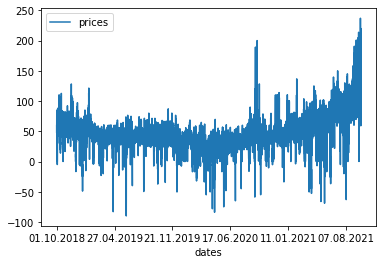

In [ ]:
prices_df.plot(x='dates', y = 'prices')
plt.show()

In [ ]:
#df_test.plot(x='dates', y = 'prices')
#plt.show()

#Creating Sequential Dataset

In [3]:
#Thanks Ahmed :) because the built in function was causing my problems
def sliding_windows(data,seq_length):
  x=[]
  y=[]

  for i in range(len(data)-seq_length-1):
    _x = data[i:(i+seq_length)]
    _y = data[i+seq_length]
    x.append(_x)
    y.append(_y)

  return np.array(x), np.array(y)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
prices_arr = prices_df['prices'].values
scaled_data = scaler.fit_transform(prices_arr.reshape(-1,1))
x,y = sliding_windows(scaled_data,23)


In [5]:
train_size = int(len(y)*0.8)
test_size = len(y) - train_size

In [6]:
trainX = x[0:train_size]
trainY = y[0:train_size]

In [7]:
testX = x[train_size:len(x)]
testY = y[train_size:len(y)]

In [8]:
print(testX[0].shape)
print(testY[0].shape)

(23, 1)
(1,)


In [9]:
print(testX[0])

[[0.40997493]
 [0.40278882]
 [0.39795731]
 [0.39502171]
 [0.39061831]
 [0.39031252]
 [0.39468534]
 [0.4072228 ]
 [0.44939147]
 [0.45633295]
 [0.44709804]
 [0.42774142]
 [0.40324751]
 [0.39725399]
 [0.39419607]
 [0.39450187]
 [0.39676472]
 [0.42009663]
 [0.45703627]
 [0.45373372]
 [0.45269402]
 [0.43208366]
 [0.40966913]]


#Defining Models

##1. Multi Layer Perceptron

###Model Definition

In [ ]:

model = Sequential()
#model.add(Dense(32, activation='sigmoid', input_dim=23))
model.add(Dense(32, activation='LeakyReLU', input_dim=23))
#model.add(Dropout(0.2))
#model.add(Dense(128, activation='sigmoid', input_dim=32))
model.add(Dense(128, activation='LeakyReLU', input_dim=32))
#model.add(Dropout(0.2))
#model.add(Dense(128, activation='sigmoid', input_dim=128))
model.add(Dense(128, activation='LeakyReLU', input_dim=128))
#model.add(Dropout(0.2))
#model.add(Dense(32, activation='sigmoid', input_dim=128))
model.add(Dense(32, activation='LeakyReLU', input_dim=128))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

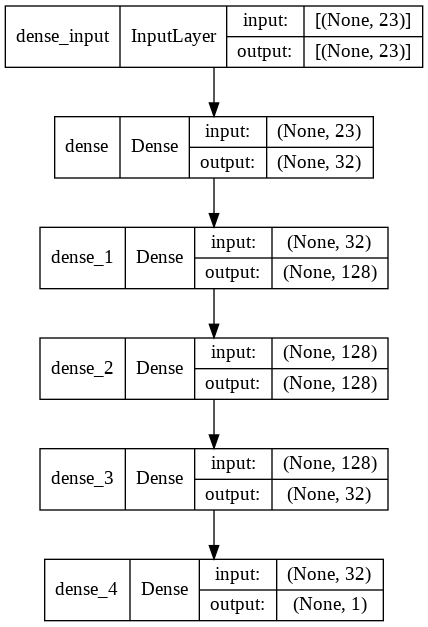

In [ ]:
plot_model(model, to_file='my_mlp_hourly.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(trainX,trainY,epochs=20,validation_data=(testX,testY))

Epoch 1/20
657/657 [==============================] - 4s 4ms/step - loss: 0.0010 - val_loss: 7.6729e-04
Epoch 2/20
657/657 [==============================] - 3s 4ms/step - loss: 3.3773e-04 - val_loss: 6.4756e-04
Epoch 3/20
657/657 [==============================] - 3s 4ms/step - loss: 2.9326e-04 - val_loss: 7.6820e-04
Epoch 4/20
657/657 [==============================] - 2s 3ms/step - loss: 2.7196e-04 - val_loss: 6.2749e-04
Epoch 5/20
657/657 [==============================] - 2s 4ms/step - loss: 2.6277e-04 - val_loss: 5.5107e-04
Epoch 6/20
657/657 [==============================] - 2s 4ms/step - loss: 2.5408e-04 - val_loss: 5.5716e-04
Epoch 7/20
657/657 [==============================] - 2s 3ms/step - loss: 2.4365e-04 - val_loss: 5.7762e-04
Epoch 8/20
657/657 [==============================] - 2s 3ms/step - loss: 2.5811e-04 - val_loss: 4.5468e-04
Epoch 9/20
657/657 [==============================] - 2s 4ms/step - loss: 2.5387e-04 - val_loss: 0.0012
Epoch 10/20
657/657 [===============

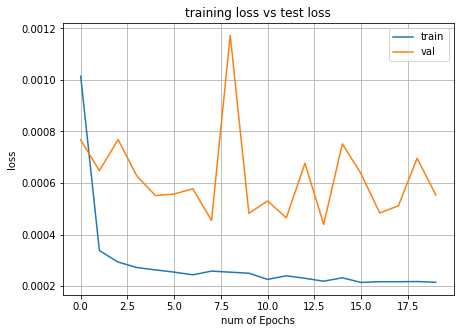

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
xc=range(20)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('training loss vs test loss')
plt.grid(True)
plt.legend(['train','val'])

In [ ]:
#model.fit(trainX,trainY,epochs=20)

In [ ]:
#loss_per_epoch = model.history.history['loss']
#plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

NameError: ignored

In [ ]:
train_y_hat = model.predict(trainX)
test_y_hat = model.predict(testX)


In [ ]:
print(testY[0])
print(testY.shape)

[0.39786557]
(5256, 1)


In [ ]:
print(test_y_hat)
print(test_y_hat.shape)

[[0.40171504]
 [0.3924682 ]
 [0.38385785]
 ...
 [0.72494406]
 [0.68356025]
 [0.622121  ]]
(5256, 1)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
train_mape = mean_absolute_percentage_error(trainY,train_y_hat)
test_mape = mean_absolute_percentage_error(testY, test_y_hat)
train_r2 = r2_score(trainY, train_y_hat)
test_r2 = r2_score(testY,test_y_hat)
train_mse = mean_squared_error(trainY, train_y_hat)
test_mse = mean_squared_error(testY,test_y_hat)

In [ ]:
print('Training MAPE: ',train_mape)
print('Test MAPE :', test_mape)

In [ ]:
print('Training R2 :', train_r2)
print('Test R2 :', test_r2)

In [ ]:
print('Training MSE :',train_mse)
print('Test MSE :',test_mse)

Training MSE : 0.00022277375413686887
Test MSE : 0.0005536571971353228


##2. Convolutional Neural Network

In [ ]:
cnnmodel = Sequential()
#cnnmodel.add(Conv1D(filters=64, kernel_size=2, activation='sigmoid', input_shape=(23,1)))
cnnmodel.add(Conv1D(filters=64, kernel_size=2, activation='LeakyReLU', input_shape=(23,1)))
cnnmodel.add(MaxPooling1D(pool_size=2))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(64, activation='LeakyReLU'))
cnnmodel.add(Dense(1))
cnnmodel.compile(optimizer='adam', loss='mse')

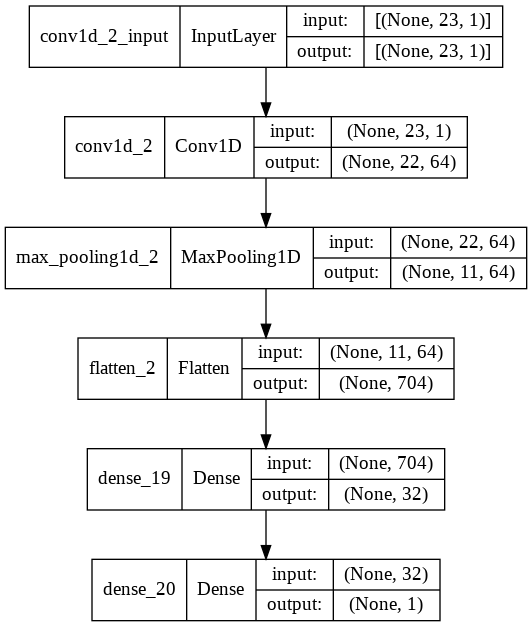

In [ ]:
plot_model(cnnmodel, to_file='my_cnn_hourly.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = cnnmodel.fit(trainX,trainY,epochs=20,validation_data=(testX,testY))

Epoch 1/20
657/657 [==============================] - 10s 4ms/step - loss: 0.0015 - val_loss: 8.2233e-04
Epoch 2/20
657/657 [==============================] - 3s 4ms/step - loss: 2.9828e-04 - val_loss: 6.4157e-04
Epoch 3/20
657/657 [==============================] - 3s 4ms/step - loss: 2.7194e-04 - val_loss: 5.5789e-04
Epoch 4/20
657/657 [==============================] - 3s 4ms/step - loss: 2.6488e-04 - val_loss: 6.2031e-04
Epoch 5/20
657/657 [==============================] - 2s 4ms/step - loss: 2.7095e-04 - val_loss: 5.3126e-04
Epoch 6/20
657/657 [==============================] - 2s 4ms/step - loss: 2.5795e-04 - val_loss: 5.5142e-04
Epoch 7/20
657/657 [==============================] - 3s 4ms/step - loss: 2.4737e-04 - val_loss: 5.9575e-04
Epoch 8/20
657/657 [==============================] - 2s 4ms/step - loss: 2.6177e-04 - val_loss: 5.0158e-04
Epoch 9/20
657/657 [==============================] - 3s 4ms/step - loss: 2.4250e-04 - val_loss: 5.8486e-04
Epoch 10/20
657/657 [==========

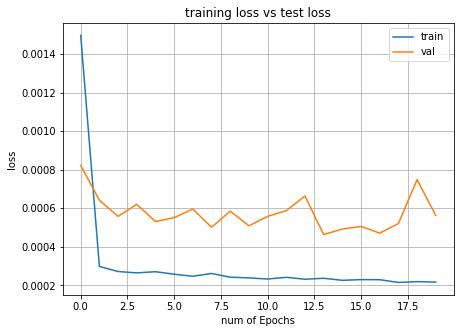

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
xc=range(20)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('training loss vs test loss')
plt.grid(True)
plt.legend(['train','val'])

In [ ]:
y_hat_train_cnn = cnnmodel.predict(trainX)
y_hat_test_cnn = cnnmodel.predict(testX)

In [ ]:
train_r2_cnn = r2_score(trainY, y_hat_train_cnn)
test_r2_cnn = r2_score(testY, y_hat_test_cnn)

train_mape_cnn = mean_absolute_percentage_error(trainY, y_hat_train_cnn)
test_mape_cnn = mean_absolute_percentage_error(testY,y_hat_test_cnn)

train_mse_cnn = mean_squared_error(trainY, y_hat_train_cnn)
test_mse_cnn = mean_squared_error(testY,y_hat_test_cnn)

print('Training R2 :',train_r2_cnn)
print('Test R2 :',test_r2_cnn)

print('Training MAPE :',train_mape_cnn)
print('Testing MAPE :',test_mape_cnn)

print('Training MSE :',train_mse_cnn)
print('Test MSE :',test_mse_cnn)

Training R2 : 0.778162022703208
Test R2 : 0.8643939089151245
Training MAPE : 17965519141.077354
Testing MAPE : 0.06076875217210969
Training MSE : 0.0006991087644162726
Test MSE : 0.00167662061400368
